In [1]:
import sys

In [2]:
cd '/srv/share3/hagrawal9/project/habitat/habitat-api/'

/coc/pskynet3/hagrawal9/project/habitat/habitat-api


In [3]:
import gzip
import json
import os
import sys
from typing import Any, Dict, List, Optional, Type

import attr
import cv2
import git
import magnum as mn
import numpy as np

# %matplotlib inline
from matplotlib import pyplot as plt
from pathlib import Path
from PIL import Image


import habitat
import habitat_sim
from habitat.core.registry import registry
from habitat_sim.utils import viz_utils as vut
from habitat.utils.visualizations import maps
from habitat.utils.visualizations.utils import observations_to_image

In [4]:
from habitat.datasets.rearrangement.rearrangement_dataset import RearrangementDatasetV0
from habitat.tasks.rearrangement.rearrangement_task import RearrangementEpisode
from rearrangement.task.environment import RearrangementRLEnv

In [5]:
from rearrangement.task.sensors import *

In [6]:
from habitat_baselines.config.default import get_config

In [24]:
config = get_config("rearrangement/configs/rearrangement.yaml")

In [25]:
config.defrost()
config.TASK_CONFIG.defrost()
config.TASK_CONFIG.TASK.MEASUREMENTS = ['OBJECT_TO_GOAL_DISTANCE', 'AGENT_TO_OBJECT_DISTANCE', 'TOP_DOWN_MAP']
config.TASK_CONFIG.freeze()
config.freeze()

In [26]:
registry.mapping['sensor']

{'HabitatSimRGBSensor': habitat.sims.habitat_simulator.habitat_simulator.HabitatSimRGBSensor,
 'HabitatSimDepthSensor': habitat.sims.habitat_simulator.habitat_simulator.HabitatSimDepthSensor,
 'HabitatSimSemanticSensor': habitat.sims.habitat_simulator.habitat_simulator.HabitatSimSemanticSensor,
 'PointGoalSensor': habitat.tasks.nav.nav.PointGoalSensor,
 'ImageGoalSensor': habitat.tasks.nav.nav.ImageGoalSensor,
 'PointGoalWithGPSCompassSensor': habitat.tasks.nav.nav.IntegratedPointGoalGPSAndCompassSensor,
 'HeadingSensor': habitat.tasks.nav.nav.HeadingSensor,
 'CompassSensor': habitat.tasks.nav.nav.EpisodicCompassSensor,
 'GPSSensor': habitat.tasks.nav.nav.EpisodicGPSSensor,
 'ProximitySensor': habitat.tasks.nav.nav.ProximitySensor,
 'QuestionSensor': habitat.tasks.eqa.eqa.QuestionSensor,
 'InstructionSensor': habitat.tasks.vln.vln.InstructionSensor,
 'GrippedObjectSensor': habitat.tasks.rearrangement.rearrangement_task.GrippedObjectSensor,
 'AllObjectPositions': habitat.tasks.rearrange

In [27]:
try:
    env.close()
except:
    pass
env = RearrangementRLEnv(config)

2020-10-22 20:04:41,104 Initializing dataset RearrangementDataset-v0
2020-10-22 20:04:41,748 initializing sim RearrangementSim-v0
I1022 20:04:57.562139 5702 simulator.py:168] Loaded navmesh data/scene_datasets/gibson_train_val/Sands.navmesh
I1022 20:04:57.566223 5702 simulator.py:180] Recomputing navmesh for agent's height 0.88 and radius 0.18.
2020-10-22 20:04:57,885 Initializing task RearrangementTask-v0


In [28]:
config.TASK_CONFIG.TASK.SENSORS

['GRIPPED_OBJECT_SENSOR',
 'ALL_OBJECT_POSITIONS',
 'ALL_OBJECT_GOALS',
 'ORACLE_NEXT_OBJECT_SENSOR',
 'RANDOM_OBJECT_SENSOR',
 'CLOSEST_OBJECT_SENSOR',
 'L2DIST_OBJECT_SENSOR']

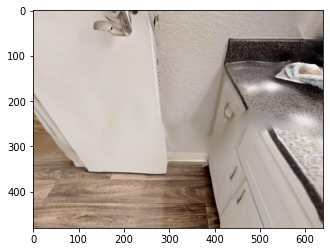

In [29]:
obs = env.reset()
obs_list = []
plt.imshow(obs['rgb'])

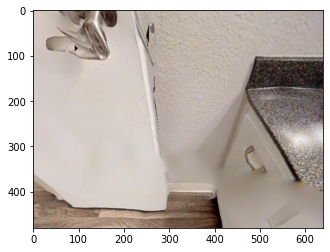

In [30]:
obs, reward, done, info = env.step(action={'action':1})
plt.imshow(obs['rgb'])

In [33]:
info

{'object_to_goal_distance': {0: 7.1029253005981445,
  1: 4.259270668029785,
  2: 4.281814098358154,
  3: 3.719473361968994,
  4: 3.6936256885528564},
 'agent_to_object_distance': {0: 6.32090425491333,
  1: 3.178032636642456,
  2: 4.586418628692627,
  3: 2.198317050933838,
  4: 2.8765716552734375},
 'top_down_map': {'map': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  'fog_of_war_mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  'agent_map_coord': (207, 240),
  'agent_angle': 3.141592653589793},
 'episode_success': False,
 'objs_success': 0.0,
 'episode_mean_dist': 4.611421823501587,
 'episode_length': 1,
 'no_of_obj

In [35]:
obs['random_object']

array([1.        , 2.29443502, 0.19029285, 4.56025743, 1.37299979])

In [ ]:
obs, reward, done, info = env.step(action={'action':2})
plt.imshow(obs['rgb'])

In [ ]:
obs, reward, done, info = env.step(action={'action':3})
plt.imshow(obs['rgb'])

In [ ]:
obs, reward, done, info = env.step(action={'action':4})
plt.imshow(obs['rgb'])
print(obs['gripped_object_id'])